# **EXPLORAÇÃO, ANÁLISE E TRATAMENTO DOS DADOS: PROJETO PREVISÃO DE DOENÇA CARDÍACA**

In [11]:
import numpy as np
import pandas as pd

In [12]:
dados = pd.read_csv(r'E:\1.CODIGOS\prevision_heart_problems\heart_data.csv',
                    sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

In [13]:
#vendos os dados
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dados.tail()

In [9]:
dados.shape

(918, 12)

## **analisando o dataset ( as variaveis dele)**

### **Age = idade**

In [14]:
dados['Age'].value_counts() # essa aqui se organiza pela quantidade de contagem

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [15]:
dados['Age'].value_counts().sort_index() # colocar em ordem o nome da coluna em si (exemplo aqui organiznando pelo age)

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64

In [16]:
import plotly.express as px # cria;ção de histograma

In [17]:
hist1 =  px.histogram (dados,y = "Age", nbins=60)# criando o histograma (nome da tabela, x= variavel que voce quer ver, nbins = largura  das linhas)
hist1.update_layout(width=800,height=500,title_text='Distribuição das idades')#configurando o layout
hist1.show()#show mostra o grafico

In [18]:
import seaborn as sns#outra biblitoeca grafica boa

c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



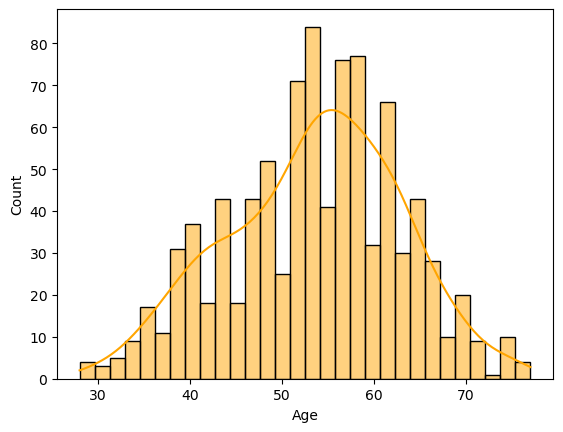

In [19]:
sns.histplot(dados, x='Age', bins=30, color="orange", kde=True, stat="count");
# formato : sns(nome da biblioteca).histplot(formato do grafico)(dados(tabela que sera usada), x="Age"(eixo x serao os dados da idade),
#color = "orange"(cor do histograma), kde = true(se vai ter uma linha extra seguindo os valores), stat="count"(o stat deve sser algum desses parametros aqui
# 'count', 'density', 'percent', 'probability' or 'frequency'))

### **Sex = sexo**

In [20]:
dados['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

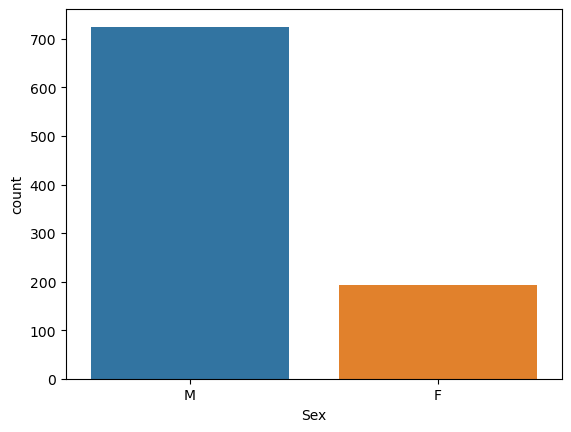

In [21]:
sns.countplot(x='Sex', data=dados);

### **Chest Pain Type = tipo de dor no peito**

In [22]:
dados['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

ASY: assintomático.

NAP: dor não anginosa.

ATA: angina atípica.

TA: angina típica.







<Axes: xlabel='ChestPainType', ylabel='count'>

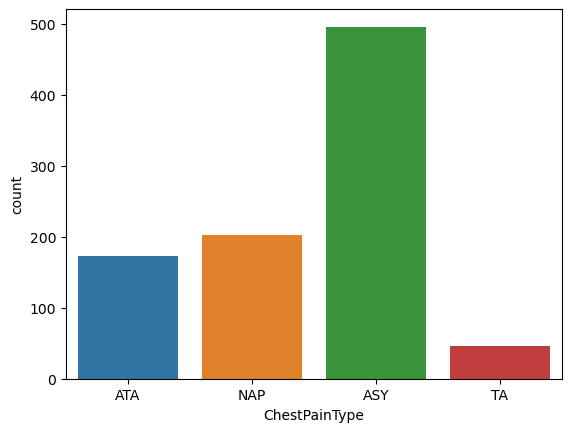

In [23]:
sns.countplot(x="ChestPainType", data=dados)

### **Resting BP (blood pressure) = pressão sanguínea em repouso em mmHg(sistólica)**

In [24]:
dados.RestingBP.value_counts().sort_index()# sortindex poe em ordem  TEM UMA PRESSAO 0 TA ERRADO !!
# nao é uma variavel discreta, é uma variavel numerica continua ou seja pode ser 80 , 80.1 80.2 e por ai vai


RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64

c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



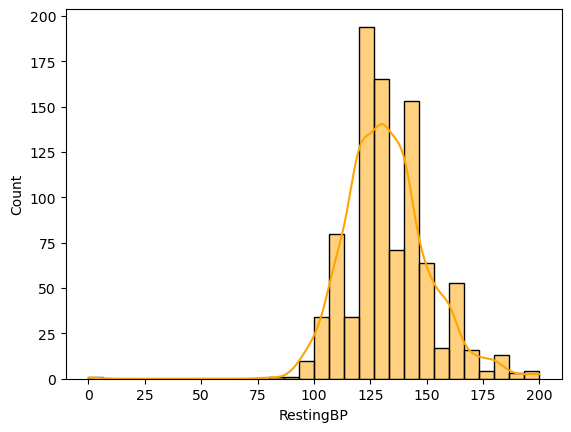

In [25]:
sns.histplot(dados, x='RestingBP', bins=30, color="orange", kde=True, stat="count");

### **Cholesterol = colesterol sérico (mg/dl)**

In [26]:
dados.Cholesterol.value_counts().sort_index() # colesterol 0 tem algum problema

Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64

c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



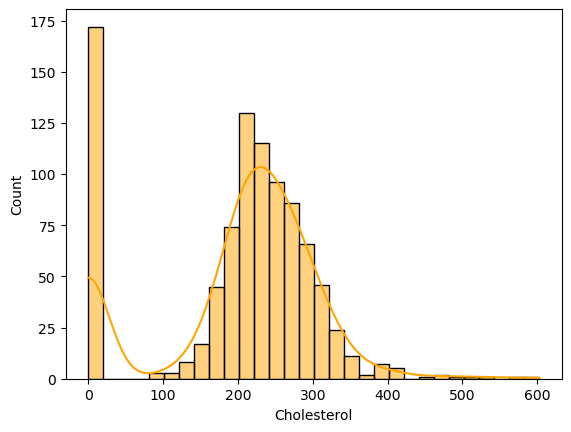

In [27]:
sns.histplot(dados, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

### **Fasting BS (blood sugar) = açúcar no sangue em jejum (mg/dl)**

In [28]:
dados.FastingBS.value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

0: Fasting BS < 120 mg/dl (não diabético)

1: Fasting BS >= 120 mg/dl, (diabético)

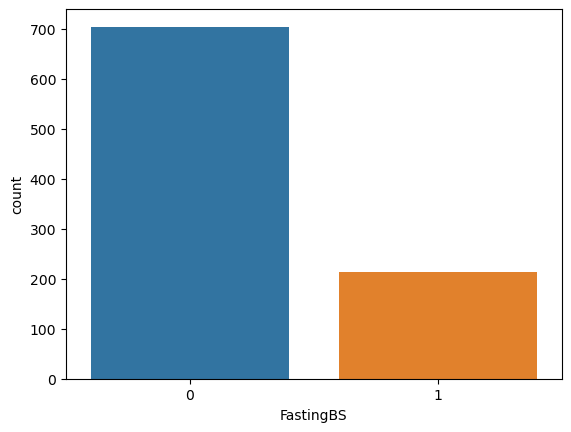

In [29]:
sns.countplot(x='FastingBS', data=dados);

### **Resting ECG = eletrocardiograma em repouso**

In [30]:
dados.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Normal: Normal

LVH: Hipertrofia ventricular esquerda

ST: Anormalidade da onda ST-T

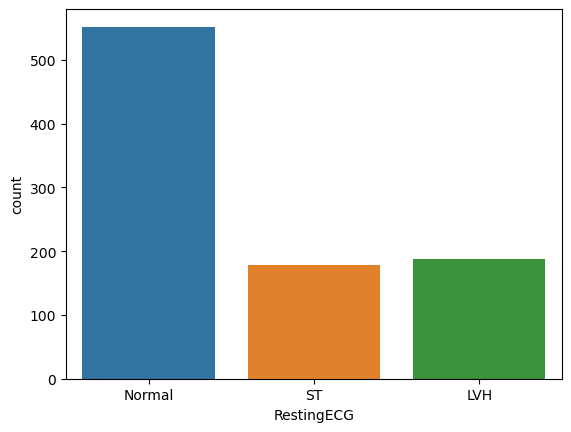

In [31]:
sns.countplot(x='RestingECG', data=dados);

### **Max HR (heart rate) = frequência cardíaca máxima**

In [32]:
dados['MaxHR'].value_counts().sort_index()

MaxHR
60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: count, Length: 119, dtype: int64

c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



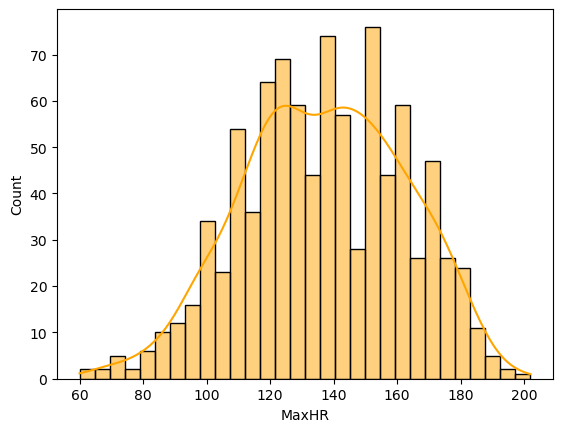

In [33]:
sns.histplot(dados, x='MaxHR', bins=30, color="orange", kde=True, stat="count");

### **Exercise Angina = Angina induzida por exercício**

In [34]:
dados['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [35]:
px.pie(dados,'ExerciseAngina')

### **Old Peak = Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso**

In [36]:
dados['Oldpeak'].value_counts()

Oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: count, dtype: int64

c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



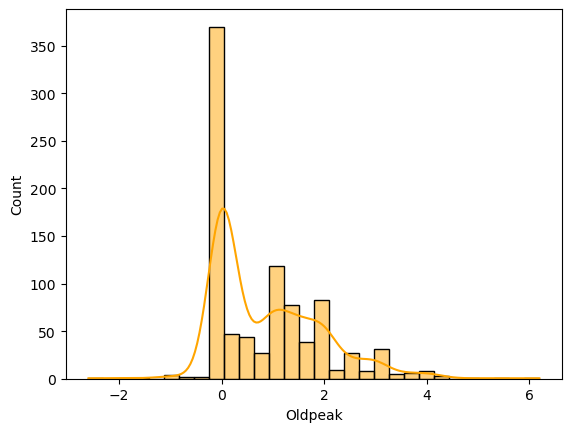

In [37]:
sns.histplot(dados, x='Oldpeak', bins=30, color="orange", kde=True, stat="count");

### **ST_Slope = Inclinação do segmento ST no ECG**

In [38]:
dados['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Flat = plano

Up = para cima

Down = para baixo

In [39]:
px.pie(dados, 'ST_Slope')

### **Heart Disease = Doença cardíaca**

In [40]:
dados['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

0 = Não possui doença cardíaca

1 = Possui doença cardíaca



In [41]:
px.pie(dados, 'HeartDisease')

tipos de variaveis(so para ter anotado )

In [42]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## **Valores faltantes(visto em algumas colunas a cima**

In [ ]:
# RELAÇÃO DA QUANTIDADE
dados.isnull().sum() ## sem nenhum valor nulo MAS caso tivesse normalmente substituimos por valors medianos ou algum outro valor para nao perder a linha de info##

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [43]:
# se tivesse aqui um valor faltando e quisessemos excluir a linha:
dadoscl = dados.dropna() # cl = clean

In [44]:
dadoscl.shape

(918, 12)

In [45]:
dadoscl.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [46]:
#susbstuindo o valor faltante(missing) pela media 
dadoscl['Age'].fillna(dadoscl['Age'].mean(), inplace=True)

In [47]:
# SUBSTITUIR OS VALORES MISSING POR QUALQUER OUTRO VALOR
dadoscl['Age'].fillna(10, inplace=True)

## **Analise Estatísticas Descritiva**

In [48]:
dados.describe() # quando voce da um describe voce consegue ver as medidas de tendencia central (tipo a media, maximo ,minimo etc)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [49]:
dados.mode() # o que mais apareceu na base

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


### **Tratando Valores errados/incoerentes**

**Excluindo registro com pressão zero**

In [50]:
dados2 = dados.loc[dados.RestingBP != 0]

In [56]:
dados2.shape

(917, 12)

In [57]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Substituindo valores zeros do Colesterol pela média sem os zeros**

In [59]:
dados2.Cholesterol.value_counts()

Cholesterol
0      171
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [51]:
dados2.Cholesterol.mean()

199.0163576881134

In [52]:
dados2.Cholesterol.replace(0, np.NaN, inplace=True)# considerar a media sem considerar os 171 valores zerados ( porque se nao puxa pra baixo) entao voce subsititui tudo que for zero por nulo 

C:\Users\nicol\AppData\Local\Temp\ipykernel_36792\3378716166.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
dados2.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [54]:
dados2.Cholesterol.mean()

244.6353887399464

In [55]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2.Cholesterol.fillna(dados2['Cholesterol'].mean(), inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_36792\88654572.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
dados2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [57]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [58]:
dados2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



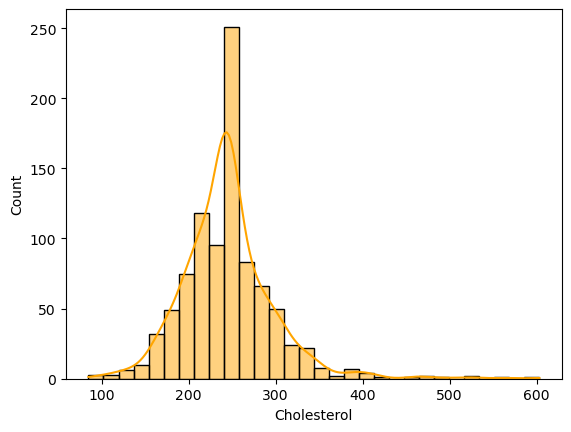

In [ ]:
sns.histplot(dados2, x='Cholesterol', bins=30, color="orange", kde=True, stat="count"); # se voce comparar esse grafico com o grafico a cima paras verificar o colesterol voce vai ver claramente a mudança dos valores nulos para a media dele


### **analsando os outliers(valores discrepantes)**

In [59]:
# Idade
px.box(dados2, y='Age')

In [60]:
# Pressão Sanguínea em Repouso
px.box(dados2, y='RestingBP')

In [61]:
# Colesterol
px.box(dados2, y='Cholesterol')

In [64]:
# Frequência Cardíaca Máxima
px.box(dados2, y='MaxHR')

In [ ]:
#SALVANDO O DATAFRAME TRATADO E ANALISADO 

In [65]:
dados2.to_csv('heart_data_tratado.csv', sep=';', encoding='utf-8', index = False)